In [1]:
%config Completer.use_jedi = False 

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Reading the dataset
df=pd.read_csv('Course_page_actions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069 entries, 0 to 4068
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4069 non-null   object 
 1   id         4069 non-null   int64  
 2   group      4069 non-null   object 
 3   action     4069 non-null   object 
 4   duration   4044 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 159.1+ KB


In [6]:
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


### Alternative hypothesis
#### Avg (Experiment. Duration)-Avg (control. Duration)>0

In [18]:
avg_exp_duration=df.query('group=="experiment"').duration.mean()
avg_exp_duration


130.94416011544428

In [19]:
avg_ctrl_duration=df.query('group=="control"').duration.mean()
avg_ctrl_duration

115.40710650582048

In [21]:
altenative_diff=avg_exp_duration-avg_ctrl_duration
altenative_diff

15.537053609623797

### Null hypothesis
#### Avg (Experiment. Duration)-Avg (control. Duration) <=0

In [25]:
null_diff=[]
for _ in range(10000):
    sample=df.sample(df.shape[0],replace=True)
    avg_exp_duration_sample=sample.query('group=="experiment"').duration.mean()
    avg_ctrl_duration_sample=sample.query('group=="control"').duration.mean()
    null_sample_diff=avg_exp_duration_sample-avg_ctrl_duration_sample
    null_diff.append(null_sample_diff)



(array([   6.,   47.,  289., 1244., 2607., 2953., 1976.,  722.,  140.,
          16.]),
 array([ 6.18420615,  7.95821379,  9.73222143, 11.50622906, 13.2802367 ,
        15.05424434, 16.82825197, 18.60225961, 20.37626725, 22.15027489,
        23.92428252]),
 <BarContainer object of 10 artists>)

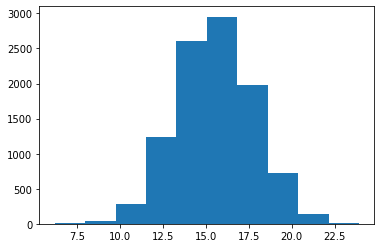

In [26]:
plt.hist(null_diff)

In [27]:
# Making the mean=0
null_diff=np.array(null_diff)
null_diff=np.random.normal(loc=0,scale=np.std(null_diff),size=null_diff.size)

(array([  11.,  135.,  631., 1850., 2991., 2674., 1333.,  325.,   43.,
           7.]),
 array([-8.6842793 , -6.87388623, -5.06349316, -3.25310009, -1.44270702,
         0.36768605,  2.17807912,  3.9884722 ,  5.79886527,  7.60925834,
         9.41965141]),
 <BarContainer object of 10 artists>)

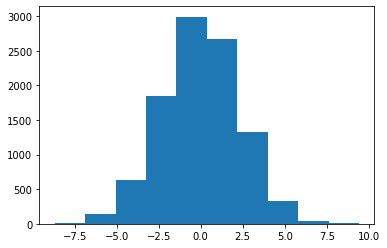

In [28]:
plt.hist(null_diff)

### Plotting the Alternative vs Null 

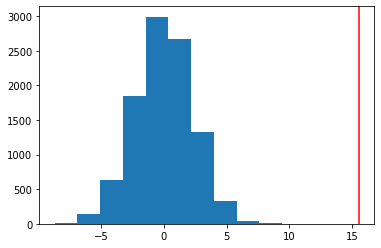

In [29]:
plt.hist(null_diff)
plt.axvline(x=altenative_diff,c='red')

### Calculating P_value

In [30]:
p_value=(null_diff>altenative_diff).mean()*100
p_value

0.0